# Finding a home in the Northeastern United States

Import the csv from Kaggle by downloading it to your google drive, store in 'MyDrive', and run code below.
*   You will have to allow Google Collab to connect with your Google Drive

In [2]:
# import libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
# load data in from google drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/realtor-data.csv"
real_estate_rawdata = pd.read_csv(path)
real_estate_rawdata.head()

Mounted at /content/drive


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


# SECTION 1: The Data

Data Dictionary:

| Feature Name | Description | Data Types |
| ------------ | ---------- | --- |
| status | _For sale or not_ | string |
| price | _Selling price in dollars_ | float |
| bed | _Number of bedrooms_ | float | 
| bath | _Number of bathrooms_ | float |
| acre_lot | _Acreage of property_ | float |
| address | _Full address of property_ | string |
| street | _Street of property_ | string |
| city | _City of property_ | string |
| state | _State of property_ | string |
| zip_code | _Zipcode of property_ | float |
| house_size | _Square footage of property_ | float | 
|sold_date | _Date of property sale_ | string |

Assumtions:
*   We assume that 'house_size' is the square footage of the property.

Changes to the data:
*   Most the data types did not have to be changed
*   We removed all duplicates by 'full_address'
*   We replaced missing values with the series average in the following series:
      *   'price'
      *   'bed'
      *   'bath'
      *   'acre_lot'
      *   'house_size'
*   We removed the outliers using the IQR method
      *    Meaning we calculated the lower and upper quantiles
      *    Determined the IQR, Upper and Lower bounds
      *    Then for the outliers that fell outside the upper bound, were replaced with the upper bound, and any outliers below the lower bound were replaced with the lower bound. 




In [5]:
# checking data types
real_estate_data.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [4]:
# drop dataframe duplicates by full_address
real_estate_data = real_estate_rawdata.drop_duplicates(subset= 'full_address', keep='first', ignore_index = True)

In [6]:
# replace missing values with mean
# create copy of df
real_estate_data_copy = real_estate_data.copy()
# correct missing values 
real_estate_data_copy['price'] = real_estate_data_copy['price'].fillna(real_estate_data_copy['price'].mean())
real_estate_data_copy['bed'] = real_estate_data_copy['bed'].fillna(real_estate_data_copy['bed'].mean())
real_estate_data_copy['bath'] = real_estate_data_copy['bath'].fillna(real_estate_data_copy['bath'].mean())
real_estate_data_copy['acre_lot'] = real_estate_data_copy['acre_lot'].fillna(real_estate_data_copy['acre_lot'].mean())
real_estate_data_copy['house_size'] = real_estate_data_copy['house_size'].fillna(real_estate_data_copy['house_size'].mean())

In [52]:
# change 'price' from a float to an integer
real_estate_data_copy['price'].astype(int)

3363       180000
3364        25000
3365       169900
3366       242000
3367       299950
           ...   
112227    1624750
112228     779000
112229    1595000
112230    1624750
112231    1624750
Name: price, Length: 108842, dtype: int64

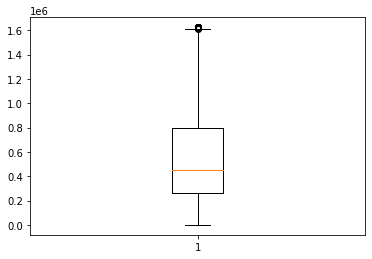

In [53]:
# show 'price' with outliers
plt.boxplot(real_estate_data_copy['price']);

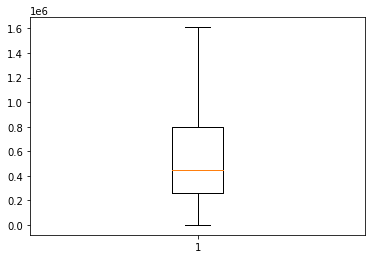

In [54]:
# show 'price' without outliers
q1 =  np.quantile(real_estate_data_copy['price'], 0.25)
q3 =  np.quantile(real_estate_data_copy['price'], 0.75)

iqr = q3 - q1

bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price'] > bound_up, bound_up, real_estate_data_copy['price'])
real_estate_data_copy['price'] =  np.where(real_estate_data_copy['price']< bound_low, bound_low, real_estate_data_copy['price'])

plt.boxplot(real_estate_data_copy['price']);

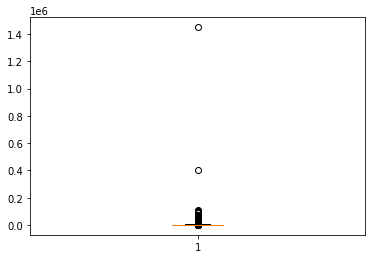

In [10]:
# square footage with outliers 
plt.boxplot(real_estate_data_copy['house_size']);

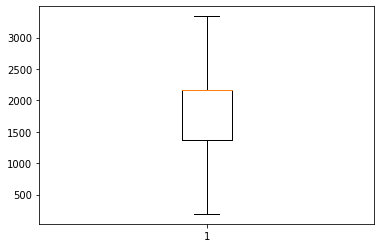

In [11]:
# square footage wihtout outliers 
q1 =  np.quantile(real_estate_data_copy['house_size'], 0.25)
q3 =  np.quantile(real_estate_data_copy['house_size'], 0.75)

iqr = q3 - q1

bound_low = q1 - 1.5 * iqr
bound_up = q3 + 1.5 * iqr

real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size'] > bound_up, bound_up, real_estate_data_copy['house_size'])
real_estate_data_copy['house_size'] =  np.where(real_estate_data_copy['house_size']< bound_low, bound_low, real_estate_data_copy['house_size'])

plt.boxplot(real_estate_data_copy['house_size']);

THE STATES


*   Due to lack of significant data the following states were removed: Geroge, South Caroline, Tennessee, Virginia, West Virigina, Wyoming. 
*   Due to lack of relevence in our analysis the following states were removed: Puerto Rico and Virgin Islands



| State Abbreviation | State | Removed | 
| ------------ | --------------- | ------------ | 
| Connecticut | CT | |
| Delaware | DE | |
| Georgia | GA | _Removed due to lack of data_ |
| Maine | ME | |
| Massachusetts | MA | |
| New Hampshire | NH | |
| New Jersey | NJ | |
| New York | NY | |
| Pennsylvania |PA | |
| Puerto Rico | PR | _Removed due irrelevance_ |
| Rhode Island |RI | |
| South Carolina | SC | _Removed due to lack of data_ |
| Tennessee | TN | _Removed due to lack of data_ |
| Vermont | VT | |
| Virgin Islands | VI | _Removed due irrelevance_ |
| Virginia | VA | _Removed due to lack of data_ |
| West Virginia | WV | _Removed due to lack of data_ |
| Wyoming | WY | _Removed due to lack of data_ |




In [12]:
# count of data in each state before removing
real_estate_data_copy['state'].value_counts()

New Jersey        32299
New York          27952
Connecticut       13776
Massachusetts     10110
Pennsylvania       9001
Maine              4986
New Hampshire      3532
Rhode Island       3409
Puerto Rico        2632
Vermont            2500
Delaware           1277
Virgin Islands      742
Virginia              7
Georgia               5
Wyoming               1
South Carolina        1
West Virginia         1
Tennessee             1
Name: state, dtype: int64

In [13]:
# removing states with lack of data
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Georgia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'South Carolina'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Tennessee'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'West Virginia'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Wyoming'], inplace = True)
# removing states with lack of relevance
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Virgin Islands'], inplace = True)
real_estate_data_copy.drop(real_estate_data_copy.index[real_estate_data_copy['state'] == 'Puerto Rico'], inplace = True)

In [14]:
# check count of data in each remaining state
real_estate_data_copy['state'].value_counts()

New Jersey       32299
New York         27952
Connecticut      13776
Massachusetts    10110
Pennsylvania      9001
Maine             4986
New Hampshire     3532
Rhode Island      3409
Vermont           2500
Delaware          1277
Name: state, dtype: int64

NEW FEATURES: We added three new features to the data.
*   Price per square foot
*   Bedroom to bathroom ratio
*   State abbreviations 



In [15]:
# calculating the price/sqft by house size
real_estate_data_copy['price_sqft'] = real_estate_data_copy['price']/real_estate_data_copy['house_size']
# calculating the bed/bath count by house
real_estate_data_copy['bed_bath_ratio'] = real_estate_data_copy['bed']/real_estate_data_copy['bath']

In [16]:
# change state names to state abbreviations
states = {
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'MA': 'Massachusetts',
        'ME': 'Maine',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NY': 'New York',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'VT': 'Vermont',}

def best_match(x):
    if len(x) == 2: # Try another way for 2-letter codes
        for a,n in states.items():
            if len(n.split()) == 2:
                if "".join([c[0] for c in n.split()]).lower() == x.lower():
                    return a.lower()
    new_rx = re.compile(r"\w*".join([ch for ch in x]), re.I)
    for a,n in states.items():
        if new_rx.match(n):
            return a.lower()
        
real_estate_data_copy['state_abbrev'] = real_estate_data_copy['state'].apply(lambda x: best_match(x)).str.upper()

Descriptive Statistics of data

In [51]:
real_estate_data_copy.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,price,bed,bath,acre_lot,zip_code,house_size,price_sqft,bed_bath_ratio
count,108842.0,108842.0,108842.0,108842.0,108835.0,108842.0,108842.0,108842.0
mean,610842.6,3.3,2.5,17.0,8485.3,1949.1,338.7,1.5
std,476638.9,1.7,1.6,799.9,4448.8,720.3,293.8,0.7
min,0.0,1.0,1.0,0.0,604.0,192.0,0.0,0.1
25%,259888.0,2.0,2.0,0.1,6110.5,1376.0,160.4,1.0
50%,450000.0,3.0,2.0,0.7,8037.0,2158.7,251.1,1.3
75%,800000.0,4.0,3.0,17.8,10308.0,2158.7,431.3,1.7
max,1624750.0,123.0,198.0,100000.0,99999.0,3338.6,4663.3,11.1


# SECTION 2: Analyze housing market of the Northeast

Comparing states across different features 

*   Price per sqft
*   Bedrooms
*   Bathrooms



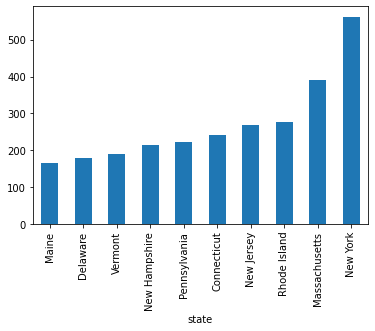

In [18]:
# Comparing states by price per square foot
real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values().plot(kind='bar');

The state with the lowest price per square foot, meaning the state where you pay the least for a square foot of space, is Maine. Following by Deleware, Vermont, New Hampshire and Pennsylvania.

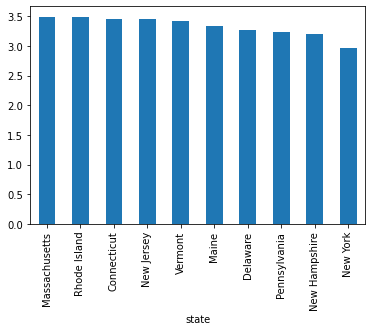

In [44]:
# Comparing states by bedrooms
real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values(ascending=False).plot(kind='bar');

The state that has the highest average of bedrooms in a house is Massachusetts. Followed by Rhode Island, Conneticut, New Jersey and Vermont.

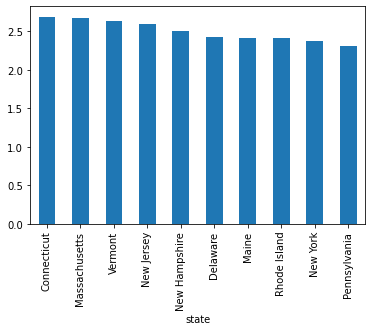

In [45]:
# Comparing states by bathrooms
real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values(ascending=False).plot(kind='bar');

The state that has the highest average of bathrooms in a house is Connecticut. Followed by Massachusetts, Vermont, New Jersey and New Hampshire.

In [43]:
# create dataframe with the rankings of all 10 states in each category
a = real_estate_data_copy.groupby('state')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True).index.tolist()
b = real_estate_data_copy.groupby('state')['bed'].agg(np.mean).round(2).sort_values(ascending = False).index.tolist()
c = real_estate_data_copy.groupby('state')['bath'].agg(np.mean).round(2).sort_values(ascending = False).index.tolist()
data = a,b,c
df = pd.DataFrame(data).transpose()
df.rename(columns = {0:'price_sqft', 1:'bed', 2:'bath'}, inplace = True)
df

,price_sqft,bed,bath
0,Maine,Massachusetts,Connecticut
1,Delaware,Rhode Island,Massachusetts
2,Vermont,Connecticut,Vermont
3,New Hampshire,New Jersey,New Jersey
4,Pennsylvania,Vermont,New Hampshire
5,Connecticut,Maine,Delaware
6,New Jersey,Delaware,Maine
7,Rhode Island,Pennsylvania,Rhode Island
8,Massachusetts,New Hampshire,New York
9,New York,New York,Pennsylvania


Observations: 
*   New York is the last in both the price per square foot and bedroom categories. New York is also second to last in bathrooms. 
*   No state falls in the top 5 of more than 2 categories. 

# SECTION 3: Analyze cities in the Northeast

Let's check to see how many cities are in each state.

In [21]:
# number of cities in each state
real_estate_data_copy.groupby('state')['city'].nunique().sort_values()

state
Delaware          18
Rhode Island      39
Pennsylvania     147
Connecticut      176
New Hampshire    232
Vermont          241
Massachusetts    412
New York         475
Maine            523
New Jersey       759
Name: city, dtype: int64

Below is function where you can input a state and get the best cities based on different features.

In [57]:
# comparing city price per sqft in the top five price per sqft states 
def city_barchart(state,feature):
  state_data = real_estate_data_copy[real_estate_data_copy['state'] == state]
  if feature == 'price_sqft':
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = True)[:10].plot(kind='bar');
  else:
    return state_data.groupby('city')[feature].agg(np.mean).round(2).sort_values(ascending = False)[:10].plot(kind='bar');

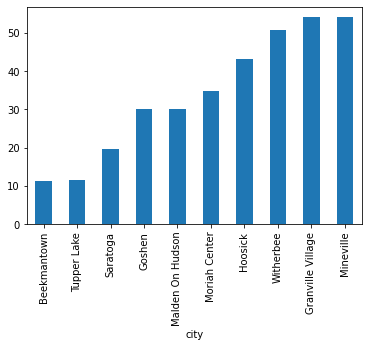

In [62]:
city_barchart('New York','price_sqft');

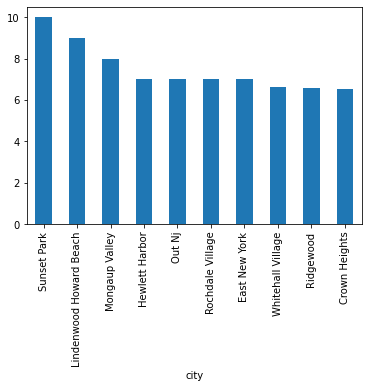

In [59]:
city_barchart('New York','bed');

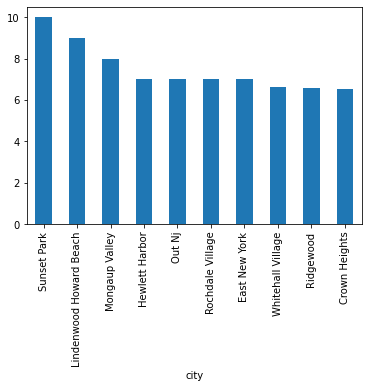

In [60]:
city_barchart('New York','bed');

Although the bar charts are a good visual of the top ten cities, let's use the funtion below to see which cities rank in the top 100 in all three categories.

In [79]:
# best price per sqft, bed and bath given state
def city_finder(state):
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  a = state_data.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:100].index.tolist()
  b = state_data.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  c = state_data.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

city_finder('NY')

['White Lake', 'Whitehall Village']

The cities of White Lake and Whitehall Village are the cities in New York where the average house as a lower price per square foot but with an above average number of bedrooms and bathrooms. 

What if our client has a budget?
*   When searching for a new home most buyers have a budget

The function below allows our client to find a city that is:
1.   Within their budget
2.   A below average price per square foot
3.   An above average amount of bedrooms and bathrooms 

In [70]:
# States in the top ten of price per sqft, number of bedroom, number of bathrooms 
def findhome_onbudget(state, budget):
  state_data = real_estate_data_copy[real_estate_data_copy['state_abbrev'] == state]
  within_budget = state_data[state_data['price'] <= budget]
  a = within_budget.groupby('city')['price_sqft'].agg(np.mean).round(2).sort_values(ascending = True)[:100].index.tolist()
  b = within_budget.groupby('city')['bed'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  c = within_budget.groupby('city')['bath'].agg(np.mean).round(2).sort_values(ascending = False)[:100].index.tolist()
  common_elements = list(set.intersection(*map(set, [ a, b, c])))
  if len(common_elements) == 0:
    return 'Nothing found'
  else:
    return common_elements

findhome_onbudget('NY',700000)

['Nassau',
 'Chatham Village',
 'Hillsdale',
 'White Lake',
 'Kinderhook',
 'Morrisonville',
 'Monticello',
 'Peru',
 'Stormville',
 'Verbank',
 'Greenwich',
 'Schodack Landing',
 'Essex',
 'Whitehall Village',
 'Milan']

# SECTION 4: Find our client the best place for them to find a home

Client Information:
*   Two adults and two kids 
*   They want atleast three bathrooms and three bedrooms
*   They have a budget of $1,000,000

What we know from our previous analysis:

# SECTION 5: Lessons Learned & Next Steps 

Lessons Learned:
*  Cleaning the data was definitely the most time consuming part of our project, from this we learned 
    *   Making sure that you have sufficient data across all sections of a cross-sectional data analysis
    *   Checking for outliers early on to avoid skewed results 

Next Steps:
*  Finding more data to expand analysis beyond just the Northeastern United States 
*  Doing a time series data analysis on the housing sales in US



# Scrap

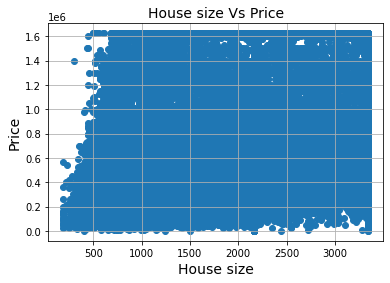

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(real_estate_data_copy['house_size'], real_estate_data_copy['price'])
plt.title('House size Vs Price', fontsize=14)
plt.xlabel('House size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()